## Lab 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

### FB-41mn Shanidze Davyd

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import os

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [6]:
data = pd.read_csv(os.path.join(path, "gym_members_exercise_tracking.csv"))
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [7]:
print("Columns:", data.columns)
print("Dataset shape:", data.shape)

Columns: Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
Dataset shape: (973, 15)


In [8]:
# Check for missing values
print(data.isnull().sum())

# Filling missing values by the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Drop rows with missing categorical values
data = data.dropna()
data.head()

correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

correlation_matrix

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697


In [14]:
data.corr()[['Calories_Burned']].sort_values(by = ['Calories_Burned'], ascending = False)

/tmp/ipykernel_3975/2511435930.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[['Calories_Burned']].sort_values(by = ['Calories_Burned'], ascending = False)


,Calories_Burned
Calories_Burned,1.000000
Session_Duration (hours),0.908140
Experience_Level,0.694129
Workout_Frequency (days/week),0.576150
Water_Intake (liters),0.356931
Avg_BPM,0.339659
Weight (kg),0.095443
Height (m),0.086348
BMI,0.059761
Resting_BPM,0.016518


<AxesSubplot: >

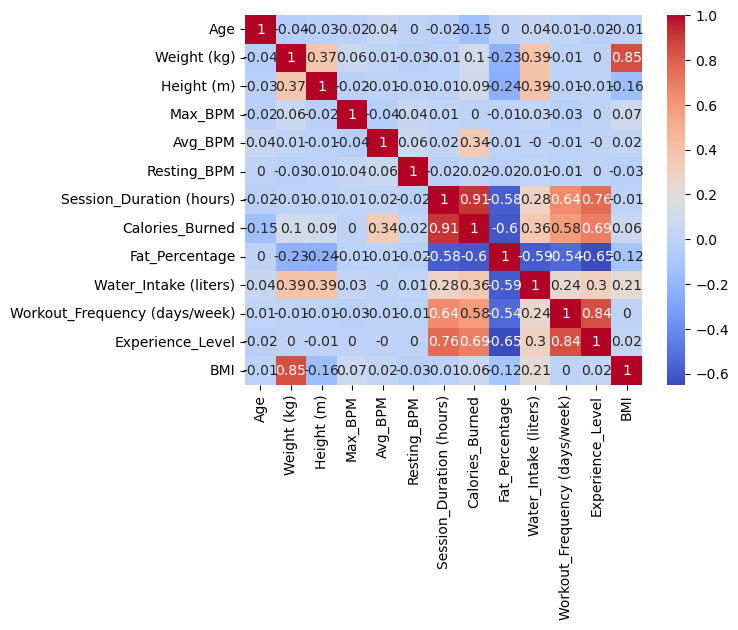

In [15]:
import seaborn as sns
sns.heatmap(correlation_matrix.round(2), annot = True, cmap = 'coolwarm')

In [17]:
X = data.drop(['Experience_Level', 'Gender', 'Workout_Type'], axis=1)
y = data['Experience_Level']
scaler = StandardScaler()
X = scaler.fit_transform(X)

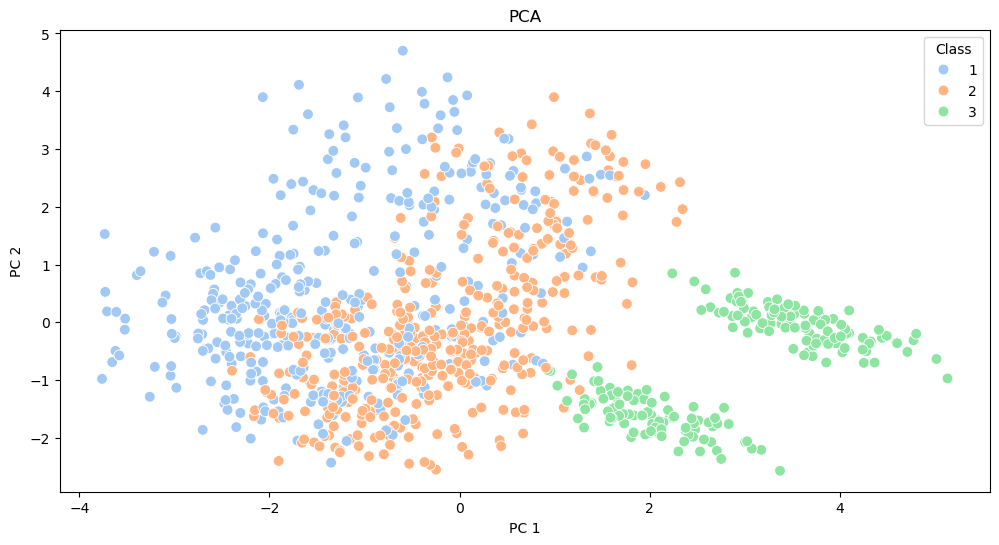

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='pastel', s=60)
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(title='Class')
plt.show()

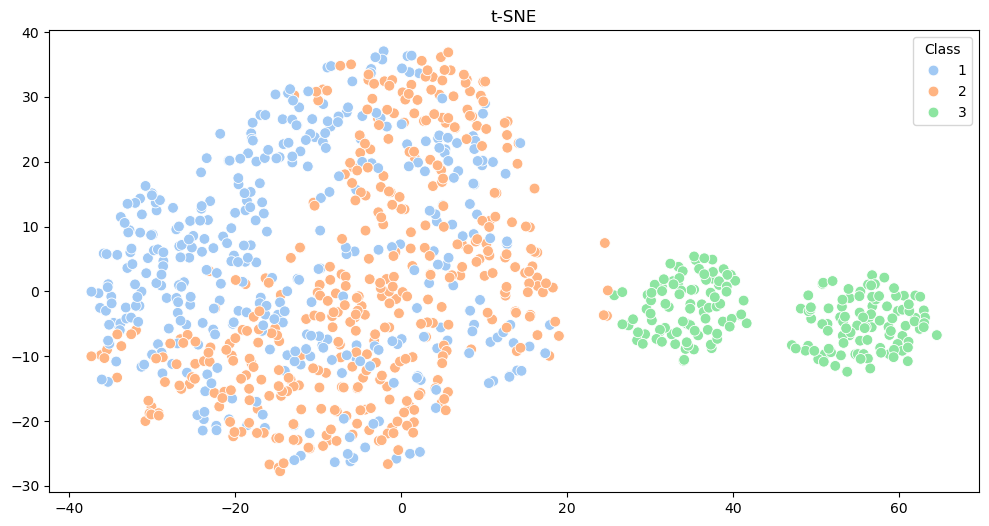

In [20]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='pastel', s=60)
plt.title('t-SNE')
plt.legend(title='Class')
plt.show()

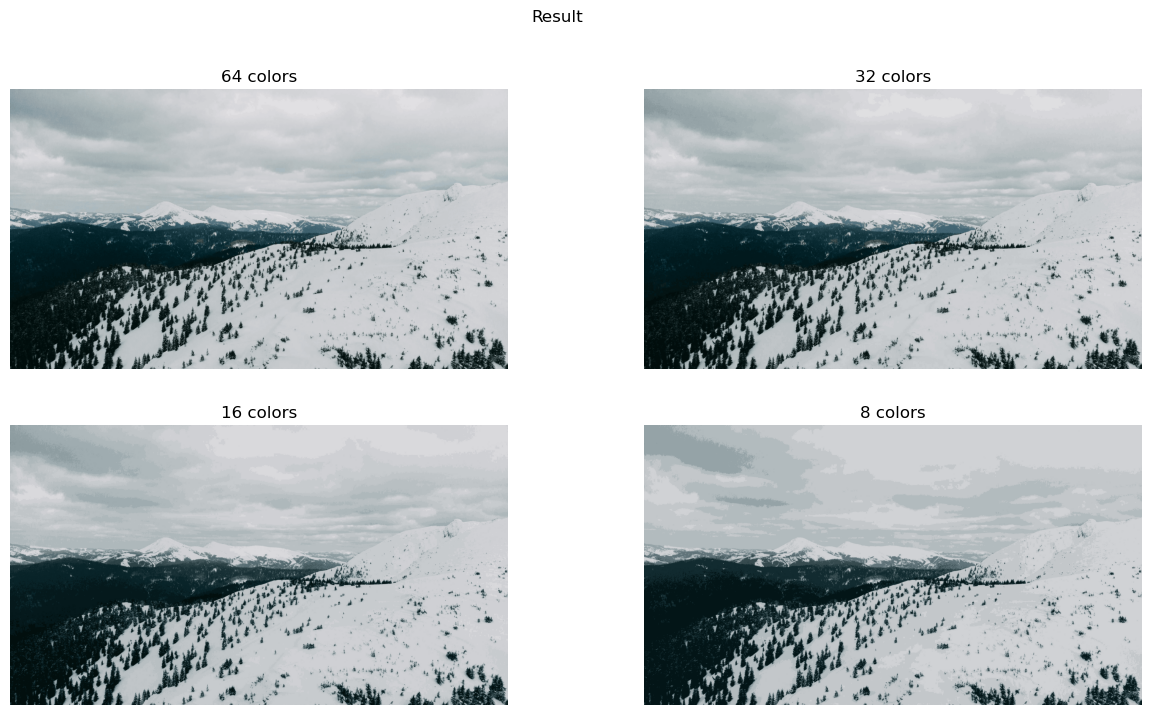

In [22]:
import cv2
from sklearn.cluster import KMeans

i_path = 'pexels-photo-7689017.jpeg'
im = cv2.imread(i_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

color_depths = [64, 32, 16, 8]
plt.figure(figsize=(15, 8))

for i, n_colors in enumerate(color_depths, 1):
    data = im.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42)
    kmeans.fit(data)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    q_im = new_colors.reshape(im.shape).astype(int)
    plt.subplot(2, 2, i)
    plt.imshow(q_im)
    plt.title(f'{n_colors} colors')
    plt.axis('off')

plt.suptitle('Result')
plt.show()

In [23]:
path = kagglehub.dataset_download("sunilthite/text-document-classification-dataset")

print("Path to dataset files:", path)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.85M/1.85M [00:00<00:00, 2.53MB/s]

Extracting files...
Path to dataset files: /home/teebeeaf/.cache/kagglehub/datasets/sunilthite/text-document-classification-dataset/versions/1


In [26]:
data = pd.read_csv(os.path.join(path, "df_file.csv"))
data.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [30]:
import string
import re
import nltk
nltk.download('stopwords')

stop_words = stopwords.words("english")
# example of text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text


data['cleaned_text'] = data['Text'].apply(clean_text)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/teebeeaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Label,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...


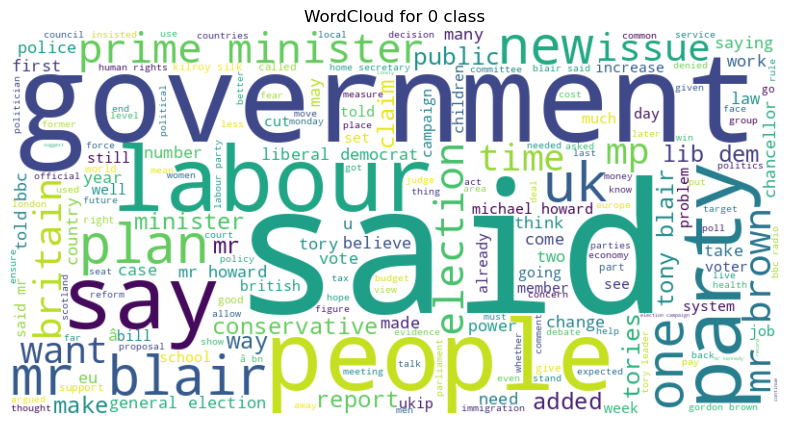

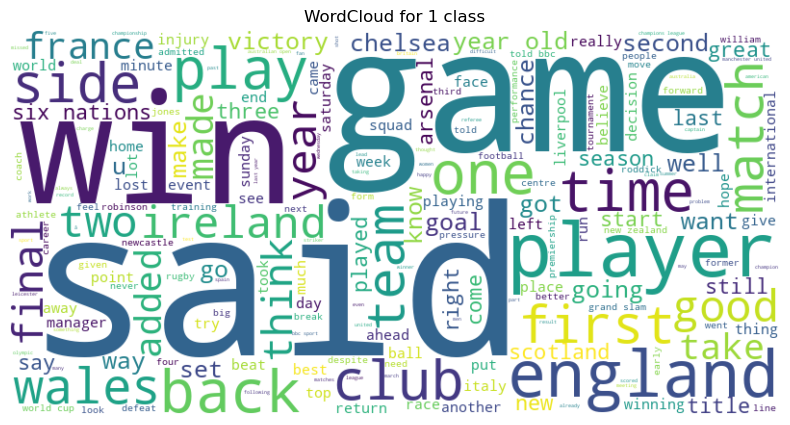

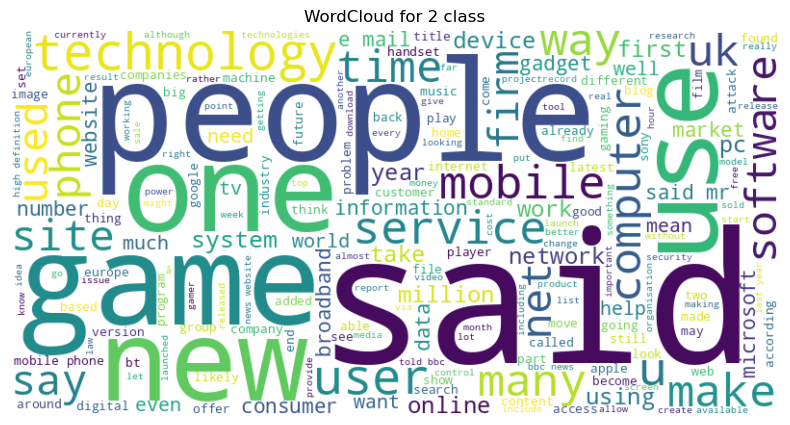

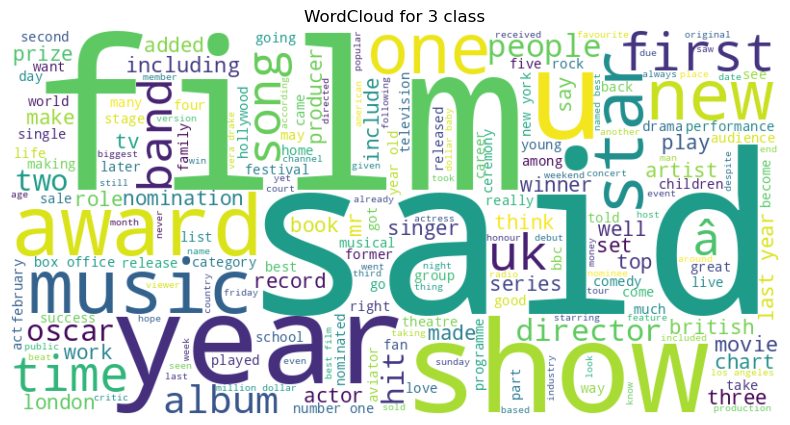

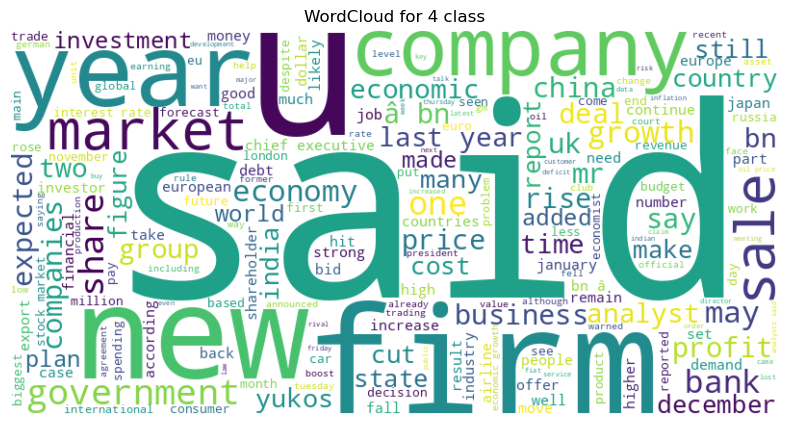

In [34]:
from wordcloud import WordCloud

def create_wordcloud(label):
    text = ' '.join(data[data['Label'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {label} class')
    plt.show()

create_wordcloud(0) # Politics 
create_wordcloud(1) # Sport 
create_wordcloud(2) # Technology 
create_wordcloud(3) # Entertainment 
create_wordcloud(4) # Business 

Яка краса там зверху

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)

X = vectorizer.fit_transform(data['cleaned_text']).toarray()

y = data['Label']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       209
           1       0.99      0.99      0.99       256
           2       0.97      0.97      0.97       200
           3       0.98      0.98      0.98       193
           4       0.98      0.95      0.97       255

    accuracy                           0.98      1113
   macro avg       0.98      0.98      0.98      1113
weighted avg       0.98      0.98      0.98      1113

